# Fourier series representation for a square wave

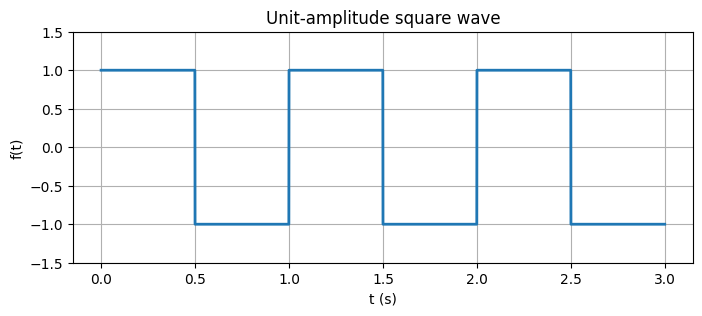

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal  # for square wave [web:7][web:9]

# --- parameters ---
T = 1.0                  # period (seconds)
A = 1.0                  # amplitude (unit)
fs = 1000                # sampling frequency (Hz)
t_end = 3 * T            # plot 3 periods

# time vector
t = np.arange(0, t_end, 1/fs)

# square wave: +1 for first half-period, -1 for second
f_t = A * signal.square(2 * np.pi * (1/T) * t)

# --- plot ---
plt.figure(figsize=(8, 3))
plt.plot(t, f_t, linewidth=2)
plt.xlabel("t (s)")
plt.ylabel("f(t)")
plt.title("Unit-amplitude square wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.show()


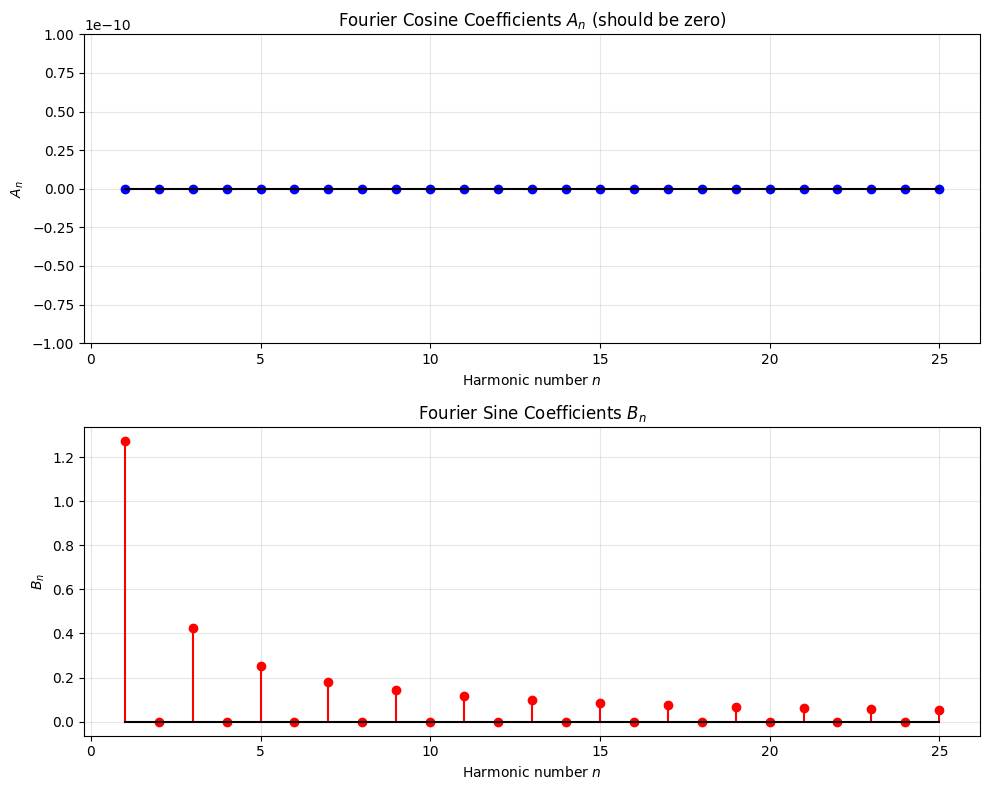

First 10 coefficients:
 n |          A_n |          B_n
--------------------------------
 1 |   0.00000000 |   1.27323954
 2 |   0.00000000 |   0.00000000
 3 |   0.00000000 |   0.42441318
 4 |   0.00000000 |   0.00000000
 5 |   0.00000000 |   0.25464791
 6 |   0.00000000 |   0.00000000
 7 |   0.00000000 |   0.18189136
 8 |   0.00000000 |   0.00000000
 9 |   0.00000000 |   0.14147106
10 |   0.00000000 |   0.00000000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----- parameters -----
T = 1.0                     # period (seconds)
omega = 2 * np.pi / T       # fundamental angular frequency
N_max = 25                  # maximum harmonic number

def compute_fourier_coefficients_analytical(N_max):
    """
    Analytical Fourier coefficients (Method 1 only):
    A_n = (2/T) * [ ∫₀^(T/2) cos(nωt) dt  -  ∫_(T/2)^T cos(nωt) dt ]
    B_n = (2/T) * [ ∫₀^(T/2) sin(nωt) dt  -  ∫_(T/2)^T sin(nωt) dt ]
    """
    An = np.zeros(N_max + 1)
    Bn = np.zeros(N_max + 1)

    for n in range(1, N_max + 1):
        # A_n (cosine integrals)
        term1_A = (np.sin(n * omega * T/2) - np.sin(0)) / (n * omega)
        term2_A = (np.sin(n * omega * T) - np.sin(n * omega * T/2)) / (n * omega)
        An[n] = (2.0 / T) * (term1_A - term2_A)

        # B_n (sine integrals)
        term1_B = (-np.cos(n * omega * T/2) + np.cos(0)) / (n * omega)
        term2_B = (-np.cos(n * omega * T) + np.cos(n * omega * T/2)) / (n * omega)
        Bn[n] = (2.0 / T) * (term1_B - term2_B)

    return An, Bn

# ----- compute coefficients -----
An, Bn = compute_fourier_coefficients_analytical(N_max)

# ----- plot A_n and B_n as point plots (fixed) -----
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

n_values = np.arange(1, N_max + 1)

# Plot 1: A_n coefficients (all ~0)
ax1.stem(n_values, An[1:], basefmt="k-", markerfmt="bo", linefmt="b-")
ax1.set_title('Fourier Cosine Coefficients $A_n$ (should be zero)')
ax1.set_xlabel('Harmonic number $n$')
ax1.set_ylabel('$A_n$')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-1e-10, 1e-10)  # zoom to show near-zero values

# Plot 2: B_n coefficients
ax2.stem(n_values, Bn[1:], basefmt="k-", markerfmt="ro", linefmt="r-")
ax2.set_title('Fourier Sine Coefficients $B_n$')
ax2.set_xlabel('Harmonic number $n$')
ax2.set_ylabel('$B_n$')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print table for reference
print("First 10 coefficients:")
print(f"{'n':>2} | {'A_n':>12} | {'B_n':>12}")
print("-" * 32)
for n in range(1, 11):
    print(f"{n:2d} | {An[n]:12.8f} | {Bn[n]:12.8f}")


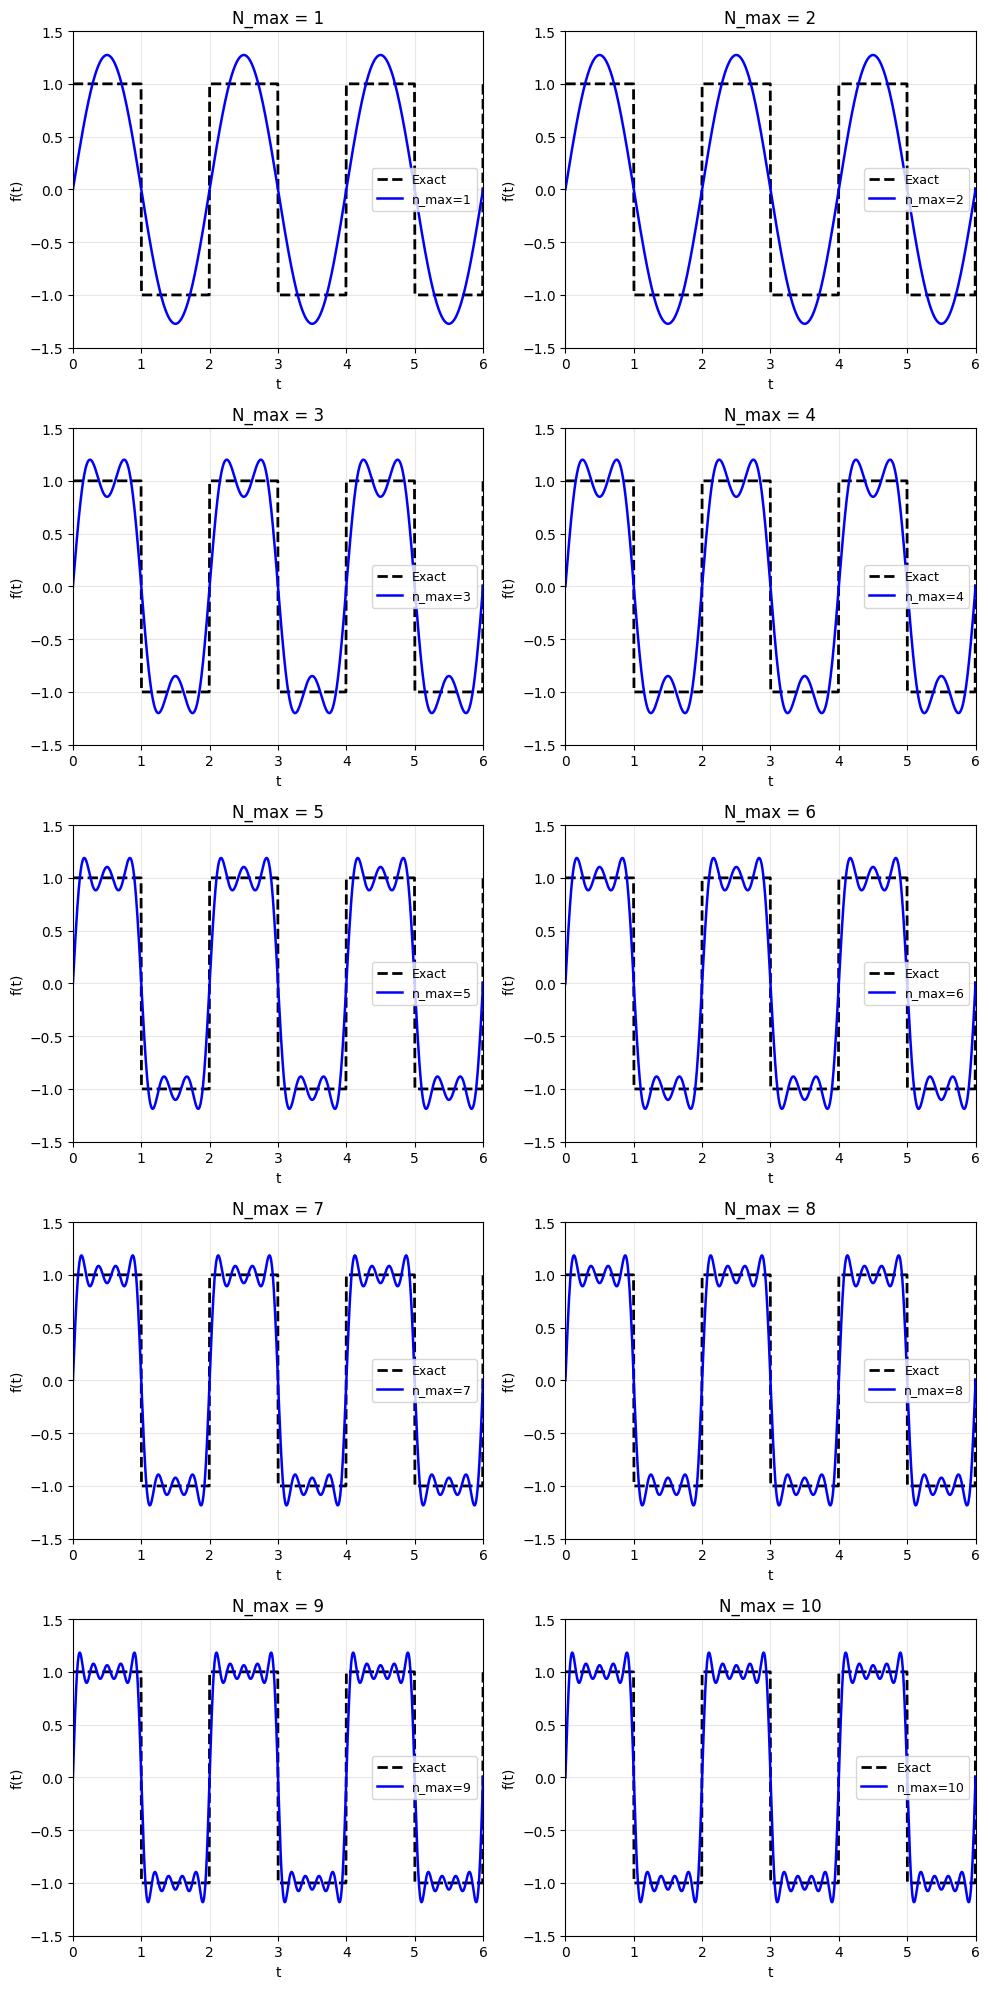

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----- SETUP -----
T = 2.0
omega = 2 * np.pi / T
t_points = 1000
t = np.linspace(0, 3*T, t_points)

def compute_fourier_coefficients_analytical(N_max):
    An = np.zeros(N_max + 1)
    Bn = np.zeros(N_max + 1)
    for n in range(1, N_max + 1):
        # A_n analytical integrals
        term1_A = (np.sin(n * omega * T/2) - np.sin(0)) / (n * omega)
        term2_A = (np.sin(n * omega * T) - np.sin(n * omega * T/2)) / (n * omega)
        An[n] = (2.0 / T) * (term1_A - term2_A)

        # B_n analytical integrals
        term1_B = (-np.cos(n * omega * T/2) + np.cos(0)) / (n * omega)
        term2_B = (-np.cos(n * omega * T) + np.cos(n * omega * T/2)) / (n * omega)
        Bn[n] = (2.0 / T) * (term1_B - term2_B)
    return An, Bn

An, Bn = compute_fourier_coefficients_analytical(10)

def square_wave(t):
    t_mod = np.mod(t, T)
    return np.where(t_mod < T/2, 1.0, -1.0)

def fourier_partial_sum(N_max, t):
    fs = np.zeros_like(t)
    for n in range(1, N_max + 1):
        fs += An[n] * np.cos(n * omega * t) + Bn[n] * np.sin(n * omega * t)
    return fs

# ----- PLOT: n_max=1 to 10 in 5x2 grid -----
fig, axes = plt.subplots(5, 2, figsize=(10, 20))  # height=20 for clarity
axes = axes.flatten()

for i in range(10):
    N = i + 1
    ax = axes[i]

    # Plot exact + approximation
    ax.plot(t, square_wave(t), 'k--', linewidth=2, label='Exact')
    ax.plot(t, fourier_partial_sum(N, t), 'b-', linewidth=1.8, label=f'n_max={N}')

    ax.set_title(f'N_max = {N}', fontsize=12)
    ax.set_xlabel('t')
    ax.set_ylabel('f(t)')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlim(0, 3*T)

plt.tight_layout()
plt.show()


## Sawtooth wave

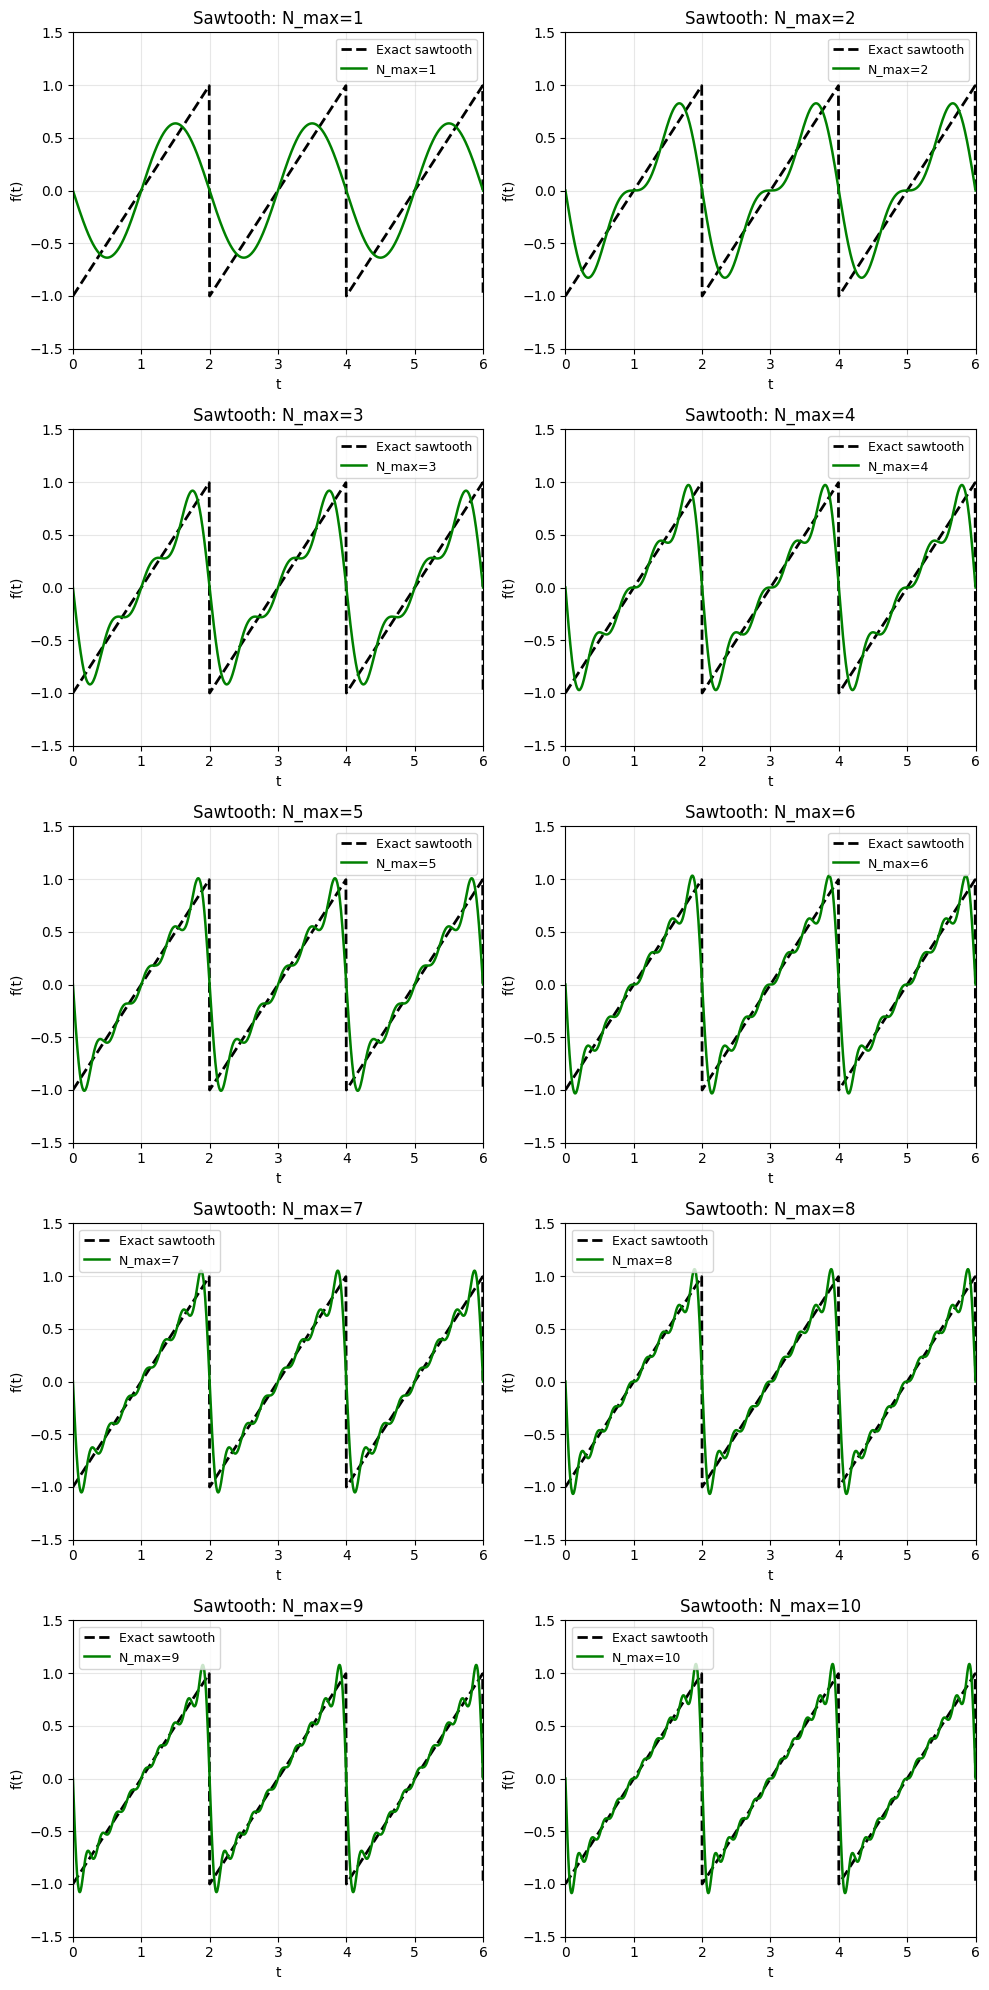

Sawtooth Fourier coefficients (analytical):
 n |        A_n |          B_n
------------------------------
 1 |   0.000000 |    -0.636620
 2 |   0.000000 |    -0.318310
 3 |   0.000000 |    -0.212207
 4 |   0.000000 |    -0.159155
 5 |   0.000000 |    -0.127324
 6 |   0.000000 |    -0.106103
 7 |   0.000000 |    -0.090946
 8 |   0.000000 |    -0.079577
 9 |   0.000000 |    -0.070736
10 |   0.000000 |    -0.063662


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----- SAWTOOTH SETUP (zero-mean: -1 to +1) -----
T = 2.0
omega = 2 * np.pi / T
t_points = 1000
t = np.linspace(0, 3*T, t_points)

def sawtooth_wave(t):
    """Sawtooth: f(t) = t - T/2 on [0,T), periodic (-1 to +1)"""
    t_mod = np.mod(t, T)
    return t_mod - T/2

def compute_sawtooth_coefficients_analytical(N_max):
    """
    ANALYTICAL Fourier coefficients for sawtooth f(t)=t-T/2 on [0,T)
    A_n = 0 (odd symmetry)
    B_n = -2/(n π)  [standard textbook result]
    """
    An = np.zeros(N_max + 1)
    Bn = np.zeros(N_max + 1)
    for n in range(1, N_max + 1):
        Bn[n] = -2.0 / (n * np.pi)
    return An, Bn

# Compute coefficients
An, Bn = compute_sawtooth_coefficients_analytical(10)

def sawtooth_fourier_sum(N_max, t):
    """Fourier partial sum using analytical coefficients"""
    fs = np.zeros_like(t)
    for n in range(1, N_max + 1):
        fs += An[n] * np.cos(n * omega * t) + Bn[n] * np.sin(n * omega * t)
    return fs

# ----- 5x2 PLOTS: n_max=1 to 10 -----
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()

for i in range(10):
    N = i + 1
    ax = axes[i]

    # Exact + Fourier approximation
    ax.plot(t, sawtooth_wave(t), 'k--', linewidth=2, label='Exact sawtooth')
    ax.plot(t, sawtooth_fourier_sum(N, t), 'g-', linewidth=1.8, label=f'N_max={N}')

    ax.set_title(f'Sawtooth: N_max={N}', fontsize=12)
    ax.set_xlabel('t')
    ax.set_ylabel('f(t)')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlim(0, 3*T)

plt.tight_layout()
plt.show()

# ----- COEFFICIENTS SUMMARY -----
print("Sawtooth Fourier coefficients (analytical):")
print(f"{'n':>2} | {'A_n':>10} | {'B_n':>12}")
print("-" * 30)
for n in range(1, 11):
    print(f"{n:2d} | {An[n]:10.6f} | {Bn[n]:12.6f}")
